# The Machine Learning Landscape

### What is machine learning?
Machine Learning is the science of programming computer so that they can learn from data

### The Machine Learning approach
Data --> Train ML Algorithm --> Evaluate the Solution --> Analyze errors --> Study the problems --> Train Again --> Deploy

### Exampls of Applications
1. Classification 
2. Prediction
3. Anomaly Detection
4. Computer Vision
5. Natural Language Processign
6. Detecting Credit Card Fraud
7. Clustering

### Types of Machine Learning
1. Supervised Learning
    - K-Nearest Neighbors Algorithm
    - Linear Regression
    - Logisitic Regression
    - Support Vector Machines
    - Decision Trees and Random Forests
    - Neural Networks
2. Unsupervised Learning
    - Clustering
        - K-Means
        - DBSCAN
        - Hierarchial Clustering Analysis
     - Anomaly Detection and Novelty Detection
         - One-class SVM
         - Isolation Forest
    - Visualization and Dimensionality Reduction
        - Principle Component Analysis (PCA)
        - Kernal PCA
        - Locality Linear Embeddings (LLE)
        - t-Distributed Stochastic Neighbor Embeddings (t-SNE)
    - Associate Rule Learning
        - Apriori Algorithms
        - Eclat
3. Semi-supervised Learning
4. Reinforcement Learning


**Batch Learning and Online Learning**

In Batch Learning, it must be trained using all the available data. Typically done offline. System is trained offline in server and then deployed in production. This is called offline learning

In Online Learning, the system incrementally by feeding it data instances sequentially, either individually or in mini-batches. Fash and Cheap. System can learn about new data in fly.


**Instance-based vs Model-Based Learning**

In instance based learning, the system learns the example by heart, then generalizes to new cases by using a similariy measure to compare them to the learned example.

Model based Learning is based on building a model of these examples and then use that model to make predictions

## Does Money Make People Happier ?

In [1]:
#  A simple linear model
# life_satisfaction = theta_0 + theta_1 X GDP per capita

#### Training and running a linear model using Scikit-learn

In [20]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from  sklearn.linear_model import LinearRegression

In [10]:
# load the data in dataframe
oecd_bli = pd.read_csv("../datasets/lifesat/oecd_bli_2015.csv", thousands=",")
gdp_per_capita = pd.read_csv("../datasets/lifesat/gdp_per_capita.csv", thousands=",", delimiter="\t", encoding="latin1", na_values="n/a")

In [17]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [18]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


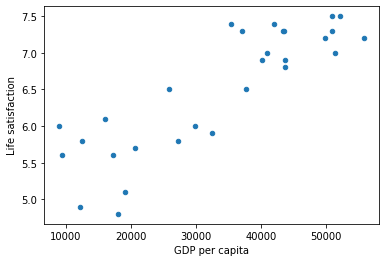

[[5.96242338]]


In [22]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

# prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# visualize the data
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()

# Select a linear model
model = LinearRegression()

model.fit(X,y)

# make a prediction for Cyprus
X_new = [[22587]] # Cyprus GDP Per capita
print(model.predict(X_new)) # output result

### Main Challenges of Machine Learning
1. Insufficient Quantity of Training Data
2. Non-representative Training Data
3. Poor Quality Data
4. Irrelevant Features --> can be minimized by feature engineering and feature extraction
5. Overfitting the training data --> overfitting means the model performs well in the training data, but it doesn't generalize well
6. Underfitting the training data --> can be minimized by selecting powerful model, feature engineering, reduce regularization

Overfitting is reduced by regularization. The amonunt of regularization to apply during a learning can be controlled by a hyper-parameter.
Tuning hyperparameters is an important part of building a machine learning system.

### HyperParameter tuning and Model Selection

How can we decide, which model to use. One option is to train 100 different models using 100 different hyperparameters.

A common solution is to use training, testing and validatin datasets. We train multiple models with various hyperparameters on the reduced training set, and you select the model that performs best on the validation set. After this holdout validation process, you train the best model on the full training set and this gives us the final model.

The validation set should be the size of right amount. else, we can have bad model. To overcome this we perform repeated cross-validation, using many small validation sets.

### No Free Lunch Theorem

> If we make absolutely no assumption about the data, then there is no reason to prefer one model over another. This is called No Free Lunch Theorem